In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon, shapiro
import sys 

from libs_spatial_features_evaluation import *

In [2]:
#input_dir = r"C:\Users\20182460\Desktop\Master_thesis\Code\Outputs\SKCM\Complete dataset\Spatial features"
#input_dir = r"C:\Users\20182460\Desktop\Master_thesis\Code\Outputs\FINAL RESULTS\SKCM_FF_FFPE\run1"
# dir_spatial_FF = f"{input_dir}/all_features_combined_FF.csv"
# dir_spatial_FFPE_FF = f"{input_dir}/all_features_combined_FFPE_FF.csv"
# dir_spatial_FFPE = f"{input_dir}/all_features_combined_FFPE.csv"

corr_method = 'pearson'

dir_spatial_FF = "/home/evos/Outputs/SKCM/spatial_features_run2/all_features_combined_FF.csv"
dir_spatial_FFPE_FF = "/home/evos/Outputs/SKCM/spatial_features_run2/all_features_combined_FFPE_FF.csv"
dir_spatial_FFPE = "/home/evos/Outputs/SKCM/spatial_features_run2/all_features_combined_FFPE.csv"

df_FF = pd.read_csv(dir_spatial_FF, sep="\t")
df_FFPE_FF = pd.read_csv(dir_spatial_FFPE_FF, sep="\t")
df_FFPE = pd.read_csv(dir_spatial_FFPE, sep="\t")

#reset indices 
df_FF.set_index('TCGA sample ID', inplace=True)
df_FFPE_FF.set_index('TCGA sample ID', inplace=True)
df_FFPE.set_index('TCGA sample ID', inplace=True)

#clean dataframes 
df_FF_cleaned = clean_graph_feature_df(df_FF)
df_FFPE_FF_cleaned = clean_graph_feature_df(df_FFPE_FF)
df_FFPE_cleaned = clean_graph_feature_df(df_FFPE)

In [3]:
#merged_df = pd.merge(df_FF_cleaned, df_FFPE_FF_cleaned, left_index=True, right_index=True, suffixes=(' 1', ' 2'), how='inner')
merged_df_FF_FFPE_FF = pd.merge(df_FF_cleaned, df_FFPE_FF_cleaned, left_index=True, right_index=True, suffixes=(' 1', ' 2'), how='inner')
merged_df_FF_FFPE = pd.merge(df_FF_cleaned, df_FFPE_cleaned, left_index=True, right_index=True, suffixes=(' 1', ' 2'), how='inner')
merged_df_FFPE = pd.merge(df_FFPE_FF_cleaned, df_FFPE_cleaned, left_index=True, right_index=True, suffixes=(' 1', ' 2'), how='inner')

#calculate correlations 
results_FF_vs_FFPE_FF_p = calc_correlations(merged_df_FF_FFPE_FF, min_pairs=2, corr_method=corr_method)
results_FF_vs_FFPE_FFPE_p = calc_correlations(merged_df_FF_FFPE, min_pairs=2, corr_method=corr_method)
results_FFPE_FF_vs_FFPE_FFPE_p = calc_correlations(merged_df_FFPE, min_pairs=2, corr_method=corr_method)
all_results = [results_FF_vs_FFPE_FF_p, results_FF_vs_FFPE_FFPE_p, results_FFPE_FF_vs_FFPE_FFPE_p]  

/home/evos/extra_code/FF_vs_FFPE_analysis/libs_spatial_features_evaluation.py:118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_merged_df = merged_df.dropna(how='any').applymap(lambda x: x if np.isfinite(x) else np.nan).dropna()


percentage significant correlation: 55.2%
percentage significant correlation: 38.5%


/home/evos/extra_code/FF_vs_FFPE_analysis/libs_spatial_features_evaluation.py:118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_merged_df = merged_df.dropna(how='any').applymap(lambda x: x if np.isfinite(x) else np.nan).dropna()
/home/evos/extra_code/FF_vs_FFPE_analysis/libs_spatial_features_evaluation.py:118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_merged_df = merged_df.dropna(how='any').applymap(lambda x: x if np.isfinite(x) else np.nan).dropna()


percentage significant correlation: 86.5%


wilcoxon
4.436403528604994e-06
wilcoxon
2.2526729505326666e-09
wilcoxon
6.098264252395885e-14


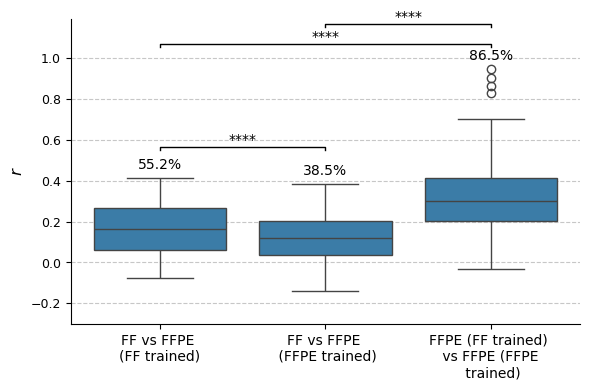

In [4]:
output_dir_plot = "/home/evos/figures/figures_FF_vs_FFPE"
titles_box=['FF vs FFPE \n(FF trained)', 'FF vs FFPE \n (FFPE trained)', 'FFPE (FF trained) \n vs FFPE (FFPE \n trained)']

corrs_FF_vs_FFPE_FF = list(all_results[0]['corrs'].values())
corrs_FF_vs_FFPE_FFPE = list(all_results[1]['corrs'].values())
corrs_FFPE = list(all_results[2]['corrs'].values())

plt.figure(figsize=(6, 4))
sns.boxplot(data=[corrs_FF_vs_FFPE_FF, corrs_FF_vs_FFPE_FFPE, corrs_FFPE], palette=["#2980b9"] * 3)

# Customize plot
plt.xticks(ticks=range(len(titles_box)), labels=titles_box, rotation=0, fontsize=10)
plt.yticks(fontsize=9)
plt.ylabel('$r$', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(all_results)):
    x_pos = i
    y_pos = max(all_results[i]['corrs'].values())+0.03
    plt.text(x_pos, y_pos, f'{all_results[i]["percentage significant corr"]:.1f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.ylim(-0.3, 1.19)

# Annotate significance levels above boxplots
y_max = max(max(corrs_FF_vs_FFPE_FF), max(corrs_FF_vs_FFPE_FFPE), max(corrs_FFPE))
#y_offsets = [y_max + 0.02, y_max + 0.08, y_max + 0.12] # Increase vertical spacing between accolades
y_offsets = [0.55, 1.05, 1.15]
comparisons = [
    (0, 1, "[FF vs FFPE (FF)] vs [FF vs FFPE (FFPE)]"),
    (0, 2, "[FF vs FFPE (FF)] vs [FFPE]"),
    (1, 2, "[FF vs FFPE (FFPE)] vs [FFPE]")
]

for idx, (i, j, label) in enumerate(comparisons):
    data1, data2 = [corrs_FF_vs_FFPE_FF, corrs_FF_vs_FFPE_FFPE, corrs_FFPE][i], [corrs_FF_vs_FFPE_FF, corrs_FF_vs_FFPE_FFPE, corrs_FFPE][j]
    
    # Perform tests
    shapiro_stat1, pvalue1 = shapiro(data1)
    shapiro_stat2, pvalue2 = shapiro(data2)

    if pvalue1 <= 0.05 or pvalue2 <= 0.05:
        print('wilcoxon')
        stat, p_value = wilcoxon(data1, data2)
        print(p_value)
    else:
        print('t-test')
        stat, p_value = wilcoxon(data1, data2)
        #stat, p_value = wilcoxon(data1, data2)
        print(p_value)
    
    # Determine significance stars based on new criteria
    if p_value < 0.0001:
        stars = "****"
    elif p_value < 0.001:
        stars = "***"
    elif p_value < 0.01:
        stars = "**"
    elif p_value < 0.05:
        stars = "*"
    else:
        stars = ""  # No stars if p-value >= 0.05

    # Draw accolades (brackets) and add stars
    if stars:
        x1, x2 = i, j  # Positions of the groups
        y, h = y_offsets[idx], 0.015  # Adjust height for thinner line and more spacing
        plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1, color='black')  # Draw thinner bracket
        plt.text((x1 + x2) / 2, y + h, stars, ha='center', va='bottom', color='black', fontsize=10)  # Adjust stars position

#plt.ylim(-0.3, y_max + 0.12)  # Extend y-axis to fit accolades
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f"{output_dir_plot}/FF_vs_FFPE_all", dpi=300) 
plt.show()
plt.close()  